In [90]:
%store -r data

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [91]:
#importing all the required ML packages

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split

from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [92]:
y = data['Survived']
X = data.drop('Survived',axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [94]:
# You call the model

# You fit the model 

# predict the model 

# display accuracy 

Accuracy for rbf SVM is  0.8268156424581006


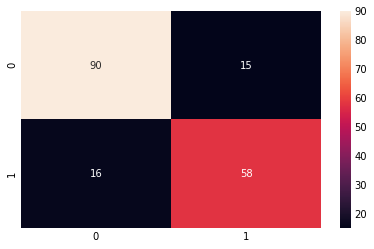

In [95]:
### Linear Support Vector Machine(linear-SVM)


model = svm.SVC(kernel='rbf', C=10,gamma = 0.3)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))


sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt='2.0f')
plt.show()

Accuracy for rbf SVM is  0.7821229050279329


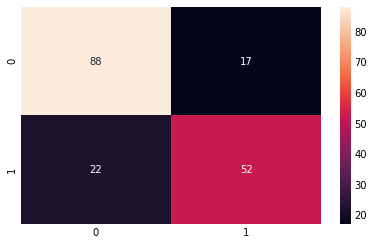

In [96]:
### Linear Support Vector Machines(rbf-SVM)

model = svm.SVC(kernel='linear', C=10,gamma = 0.4)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2,y_test))
sns.heatmap(confusion_matrix(y_test,prediction2),annot=True,fmt='2.0f')
plt.show()

Accuracy for KNN is  0.8324022346368715


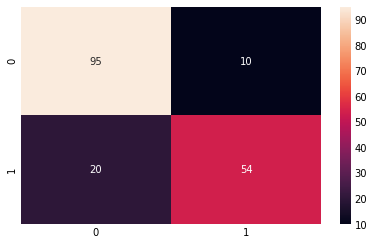

In [97]:
# KNN 

model=KNeighborsClassifier(n_neighbors=6) 
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('Accuracy for KNN is ',metrics.accuracy_score(prediction3,y_test))

sns.heatmap(confusion_matrix(y_test,prediction3),annot=True,fmt='2.0f')
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

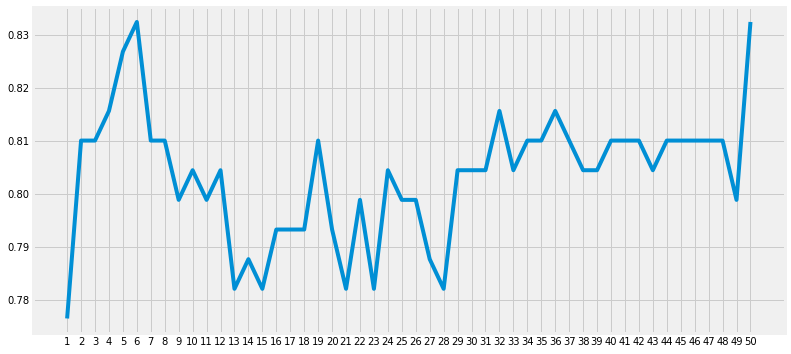

with the max value as  0.8324022346368715


In [98]:
from tqdm import tqdm_notebook

a= pd.Series()
k = 50
x = [(i+1) for i in range(k)] 

for i in tqdm_notebook(x):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('with the max value as ',a.values.max())

The accuracy of the NaiveBayes is 0.7653631284916201


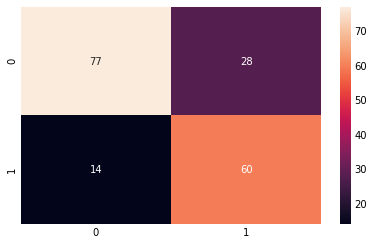

In [99]:
#NB

model=GaussianNB()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction4,y_test))

sns.heatmap(confusion_matrix(y_test,prediction4),annot=True,fmt='2.0f')
plt.show()

The accuracy of the Decision Tree is 0.8156424581005587


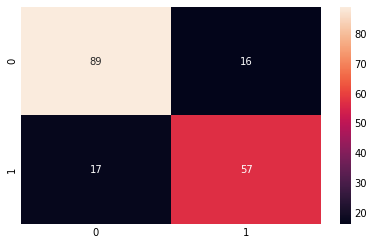

In [100]:
#Decision Trees


model=DecisionTreeClassifier(max_depth =9,criterion="entropy",min_samples_split=40)
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction5,y_test))

sns.heatmap(confusion_matrix(y_test,prediction5),annot=True,fmt='2.0f')
plt.show()

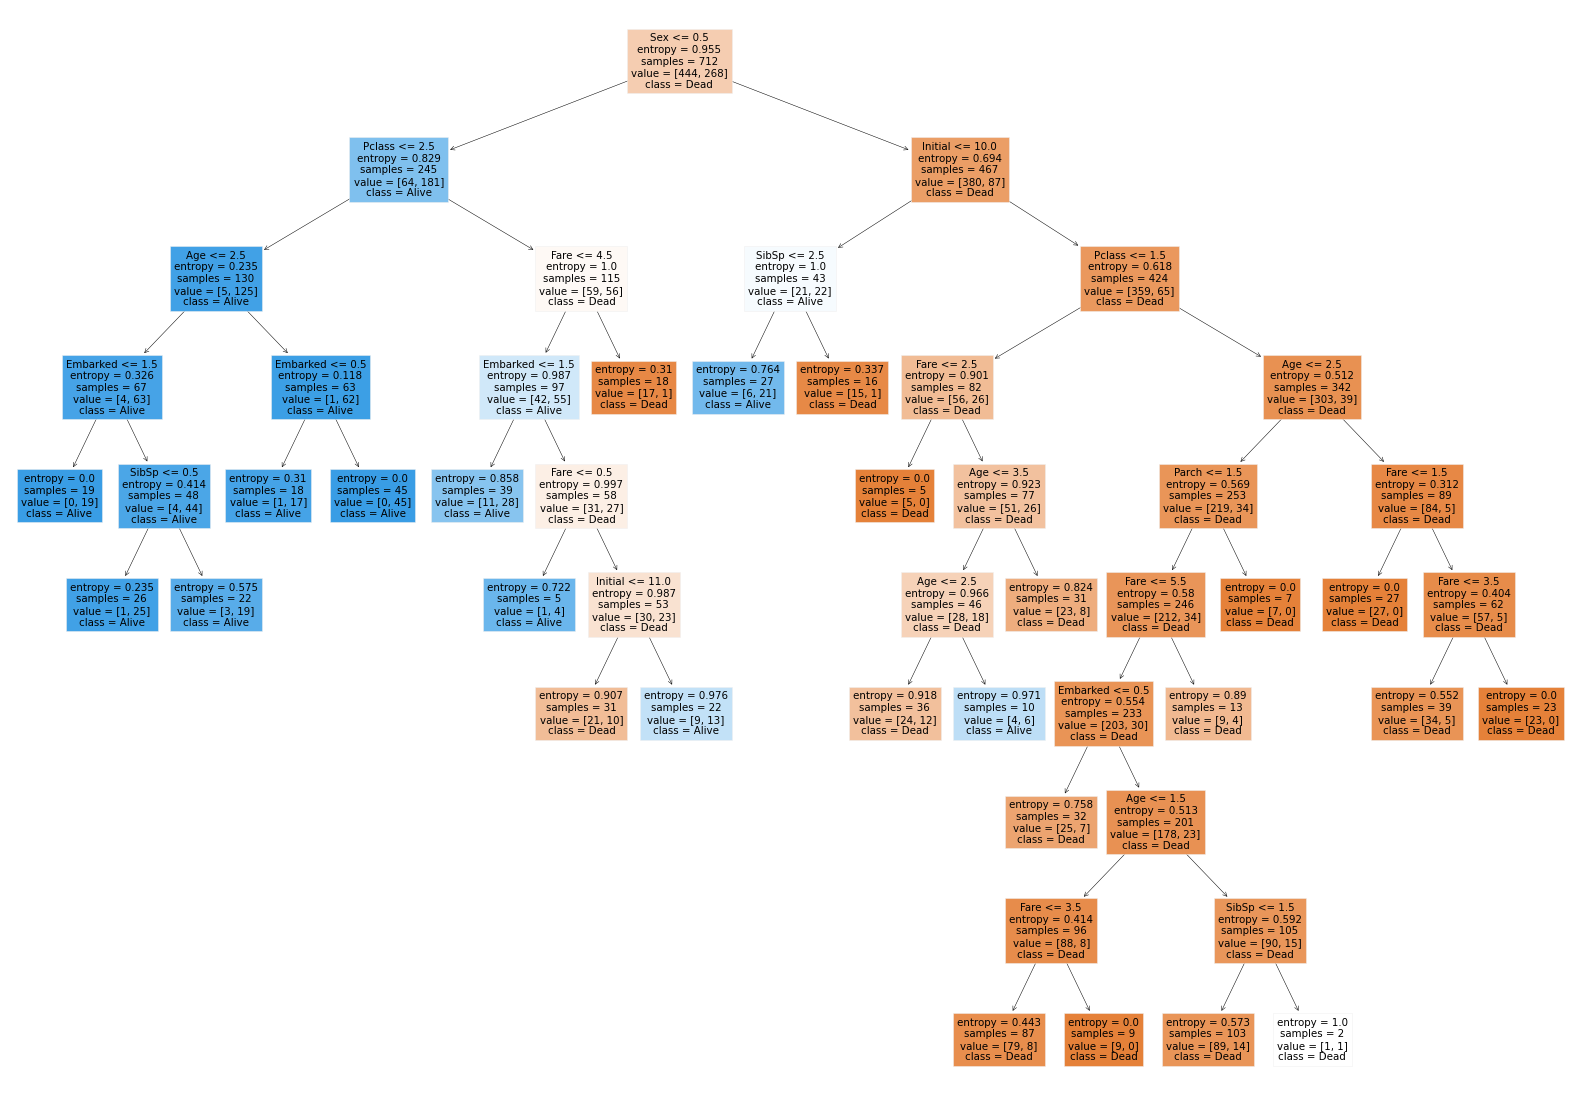

In [101]:
# Export as dot file
from sklearn import tree

feature_names = list(X_train.columns)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                    class_names=["Dead","Alive"],
                   filled=True)